In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [21]:
get_available_gpus()


['/device:GPU:0']

In [23]:
with np.load("notMNIST.npz") as data :
    Data, Target = data ["images"], data["labels"]
    posClass = 2
    negClass = 9
    dataIndx = (Target==posClass) + (Target==negClass)
    Data = Data[dataIndx]/255.
    Target = Target[dataIndx].reshape(-1, 1)
    Target[Target==posClass] = 1
    Target[Target==negClass] = 0
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data, Target = Data[randIndx], Target[randIndx]
    trainData, trainTarget = Data[:3500], Target[:3500]
    validData, validTarget = Data[3500:3600], Target[3500:3600]
    testData, testTarget = Data[3600:], Target[3600:]

In [32]:
learning_rate = 0.005
n_epochs = 20000
batch_size = 500
n_dim = 28*28

In [33]:
def grab_batches(trainData, trainTarget, batch_size):
    batch_indices = np.random.permutation(range(3500)).reshape(-1, batch_size)
    X_batches = trainData.reshape(-1, n_dim)[batch_indices]
    y_batches = trainTarget[batch_indices]
    batches = zip(X_batches, y_batches)
    return batches

In [34]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.random_normal((n_dim,1), stddev=1e-2))
b = tf.Variable(tf.ones((1, 1)))
weight_decay = tf.placeholder(tf.float32)

In [35]:
y_ = tf.matmul(X, W) + b

loss = tf.reduce_mean(tf.squared_difference(y_, Y))
regularizer = tf.nn.l2_loss(W)
loss = tf.reduce_mean(loss + weight_decay * regularizer)

prediction = tf.cast(tf.round(tf.sigmoid(y_)), tf.int8)
equality = tf.equal(prediction, tf.cast(Y, tf.int8))
accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))

training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()

In [36]:
weight_decays = [0.0, 0.001, 0.1, 1]
valid_accuracies = []
train_accuracies = []
test_accuracies = []

In [37]:
with tf.Session() as sess:
    for wd in weight_decays:
        sess.run(init)
        print("Weight Decay: {} \n".format(wd))
        for epoch in range(1,n_epochs+1):
            batches = grab_batches(trainData, trainTarget, batch_size)
            for X_batch, y_batch in batches:
                sess.run(training_step, feed_dict={X: X_batch, Y: y_batch, weight_decay: wd})
            if epoch % 500 == 0:
                feed_dict ={X: trainData.reshape(-1,n_dim), Y: trainTarget, weight_decay: wd}
                train_loss, train_accuracy = sess.run([loss, accuracy], feed_dict)
                print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, train_loss, train_accuracy))
        train_accuracies.append(train_accuracy)
        valid_accuracy = sess.run(accuracy, feed_dict = {X: validData.reshape(-1,n_dim), Y: validTarget})
        valid_accuracies.append(valid_accuracy)
        test_accuracy = sess.run(accuracy, feed_dict = {X: testData.reshape(-1,n_dim), Y: testTarget})
        test_accuracies.append(test_accuracy)

Weight Decay: 0.0 



Epoch: 500, Loss: 0.026852399110794067, Accuracy: 0.6679999828338623


Epoch: 1000, Loss: 0.02480996958911419, Accuracy: 0.702571451663971


Epoch: 1500, Loss: 0.024455854669213295, Accuracy: 0.6531428694725037


Epoch: 2000, Loss: 0.023601209744811058, Accuracy: 0.6688571572303772


Epoch: 2500, Loss: 0.022923119366168976, Accuracy: 0.6962857246398926


Epoch: 3000, Loss: 0.022640397772192955, Accuracy: 0.7059999704360962


Epoch: 3500, Loss: 0.022351985797286034, Accuracy: 0.7008571624755859


Epoch: 4000, Loss: 0.022254709154367447, Accuracy: 0.6708571314811707


Epoch: 4500, Loss: 0.022054873406887054, Accuracy: 0.7182857394218445


Epoch: 5000, Loss: 0.021739115938544273, Accuracy: 0.6865714192390442


Epoch: 5500, Loss: 0.02160174585878849, Accuracy: 0.7114285826683044


Epoch: 6000, Loss: 0.02143056131899357, Accuracy: 0.7062857151031494


Epoch: 6500, Loss: 0.021291082724928856, Accuracy: 0.7008571624755859


Epoch: 7000, Loss: 0.021321959793567657, Accuracy: 0.6748571395874023


Epoch: 7500, Loss: 0.02122325636446476, Accuracy: 0.6765714287757874


Epoch: 8000, Loss: 0.0211076308041811, Accuracy: 0.6785714030265808


Epoch: 8500, Loss: 0.020924756303429604, Accuracy: 0.6868571639060974


Epoch: 9000, Loss: 0.020822765305638313, Accuracy: 0.7037143111228943


Epoch: 9500, Loss: 0.02078581042587757, Accuracy: 0.7134285569190979


Epoch: 10000, Loss: 0.020902017131447792, Accuracy: 0.665142834186554


Epoch: 10500, Loss: 0.020987294614315033, Accuracy: 0.659428596496582


Epoch: 11000, Loss: 0.02069968543946743, Accuracy: 0.682285726070404


Epoch: 11500, Loss: 0.020894469693303108, Accuracy: 0.6674285531044006


Epoch: 12000, Loss: 0.02073563076555729, Accuracy: 0.7334285974502563


Epoch: 12500, Loss: 0.020377207547426224, Accuracy: 0.696571409702301


Epoch: 13000, Loss: 0.02060282975435257, Accuracy: 0.7302857041358948


Epoch: 13500, Loss: 0.020283011719584465, Accuracy: 0.6959999799728394


Epoch: 14000, Loss: 0.020332742482423782, Accuracy: 0.6845714449882507


Epoch: 14500, Loss: 0.020206186920404434, Accuracy: 0.7120000123977661


Epoch: 15000, Loss: 0.02019752375781536, Accuracy: 0.7142857313156128


Epoch: 15500, Loss: 0.020114075392484665, Accuracy: 0.7051428556442261


Epoch: 16000, Loss: 0.020084049552679062, Accuracy: 0.7099999785423279


Epoch: 16500, Loss: 0.020235326141119003, Accuracy: 0.7294285893440247


Epoch: 17000, Loss: 0.02012975886464119, Accuracy: 0.6845714449882507


Epoch: 17500, Loss: 0.019996531307697296, Accuracy: 0.694857120513916


Epoch: 18000, Loss: 0.01996212638914585, Accuracy: 0.7054286003112793


Epoch: 18500, Loss: 0.019949713721871376, Accuracy: 0.7142857313156128


Epoch: 19000, Loss: 0.019944174215197563, Accuracy: 0.7142857313156128


Epoch: 19500, Loss: 0.020154286175966263, Accuracy: 0.728857159614563


Epoch: 20000, Loss: 0.020035287365317345, Accuracy: 0.6814285516738892
Weight Decay: 0.001 



Epoch: 500, Loss: 0.02687034010887146, Accuracy: 0.6945714354515076


Epoch: 1000, Loss: 0.02500278316438198, Accuracy: 0.7051428556442261


Epoch: 1500, Loss: 0.024157367646694183, Accuracy: 0.6928571462631226


Epoch: 2000, Loss: 0.024417372420430183, Accuracy: 0.7371428608894348


Epoch: 2500, Loss: 0.02348342165350914, Accuracy: 0.6642857193946838


Epoch: 3000, Loss: 0.022997435182332993, Accuracy: 0.6908571720123291


Epoch: 3500, Loss: 0.023115847259759903, Accuracy: 0.6545714139938354


Epoch: 4000, Loss: 0.022631436586380005, Accuracy: 0.6814285516738892


Epoch: 4500, Loss: 0.022611763328313828, Accuracy: 0.7160000205039978


Epoch: 5000, Loss: 0.02244192361831665, Accuracy: 0.6759999990463257


Epoch: 5500, Loss: 0.022225242108106613, Accuracy: 0.6862857341766357


Epoch: 6000, Loss: 0.022237157449126244, Accuracy: 0.7157142758369446


Epoch: 6500, Loss: 0.022209346294403076, Accuracy: 0.7182857394218445


Epoch: 7000, Loss: 0.022072894498705864, Accuracy: 0.6779999732971191


Epoch: 7500, Loss: 0.021931979805231094, Accuracy: 0.691428542137146


Epoch: 8000, Loss: 0.021957505494356155, Accuracy: 0.7182857394218445


Epoch: 8500, Loss: 0.021805889904499054, Accuracy: 0.693142831325531


Epoch: 9000, Loss: 0.02181803248822689, Accuracy: 0.6868571639060974


Epoch: 9500, Loss: 0.02172708511352539, Accuracy: 0.6902857422828674


Epoch: 10000, Loss: 0.022350352257490158, Accuracy: 0.6451428532600403


Epoch: 10500, Loss: 0.021768849343061447, Accuracy: 0.6774285435676575


Epoch: 11000, Loss: 0.021629109978675842, Accuracy: 0.699999988079071


Epoch: 11500, Loss: 0.02173634245991707, Accuracy: 0.6800000071525574


Epoch: 12000, Loss: 0.02165205217897892, Accuracy: 0.6794285774230957


Epoch: 12500, Loss: 0.02155080810189247, Accuracy: 0.6959999799728394


Epoch: 13000, Loss: 0.02156967483460903, Accuracy: 0.7062857151031494


Epoch: 13500, Loss: 0.02151133306324482, Accuracy: 0.6994285583496094


Epoch: 14000, Loss: 0.021513639017939568, Accuracy: 0.7045714259147644


Epoch: 14500, Loss: 0.021488279104232788, Accuracy: 0.6945714354515076


Epoch: 15000, Loss: 0.021677738055586815, Accuracy: 0.7277143001556396


Epoch: 15500, Loss: 0.021472521126270294, Accuracy: 0.6922857165336609


Epoch: 16000, Loss: 0.021448787301778793, Accuracy: 0.6951428651809692


Epoch: 16500, Loss: 0.021467136219143867, Accuracy: 0.6854285597801208


Epoch: 17000, Loss: 0.021621905267238617, Accuracy: 0.7265714406967163


Epoch: 17500, Loss: 0.021470073610544205, Accuracy: 0.7128571271896362


Epoch: 18000, Loss: 0.021622300148010254, Accuracy: 0.7217142581939697


Epoch: 18500, Loss: 0.021388256922364235, Accuracy: 0.6977142691612244


Epoch: 19000, Loss: 0.02150464989244938, Accuracy: 0.6762857437133789


Epoch: 19500, Loss: 0.021376468241214752, Accuracy: 0.6957142949104309


Epoch: 20000, Loss: 0.021380605176091194, Accuracy: 0.6902857422828674
Weight Decay: 0.1 



Epoch: 500, Loss: 0.03150227293372154, Accuracy: 0.6637142896652222


Epoch: 1000, Loss: 0.03104311414062977, Accuracy: 0.6628571152687073


Epoch: 1500, Loss: 0.03130843862891197, Accuracy: 0.6380000114440918


Epoch: 2000, Loss: 0.030933355912566185, Accuracy: 0.6902857422828674


Epoch: 2500, Loss: 0.03090551309287548, Accuracy: 0.6711428761482239


Epoch: 3000, Loss: 0.0309161264449358, Accuracy: 0.6700000166893005


Epoch: 3500, Loss: 0.031053347513079643, Accuracy: 0.6522856950759888


Epoch: 4000, Loss: 0.031156081706285477, Accuracy: 0.6499999761581421


Epoch: 4500, Loss: 0.030910218134522438, Accuracy: 0.6828571557998657


Epoch: 5000, Loss: 0.030908996239304543, Accuracy: 0.668571412563324


Epoch: 5500, Loss: 0.03092544712126255, Accuracy: 0.6660000085830688


Epoch: 6000, Loss: 0.03100600838661194, Accuracy: 0.6597142815589905


Epoch: 6500, Loss: 0.03113824501633644, Accuracy: 0.6485714316368103


Epoch: 7000, Loss: 0.03090319223701954, Accuracy: 0.677142858505249


Epoch: 7500, Loss: 0.03090597689151764, Accuracy: 0.680571436882019


Epoch: 8000, Loss: 0.03090164251625538, Accuracy: 0.678857147693634


Epoch: 8500, Loss: 0.030919890850782394, Accuracy: 0.6728571653366089


Epoch: 9000, Loss: 0.030902203172445297, Accuracy: 0.677142858505249


Epoch: 9500, Loss: 0.030991414561867714, Accuracy: 0.6568571329116821


Epoch: 10000, Loss: 0.031207222491502762, Accuracy: 0.7059999704360962


Epoch: 10500, Loss: 0.030941486358642578, Accuracy: 0.6662856936454773


Epoch: 11000, Loss: 0.0309405867010355, Accuracy: 0.6657142639160156


Epoch: 11500, Loss: 0.030970195308327675, Accuracy: 0.6934285759925842


Epoch: 12000, Loss: 0.031094053760170937, Accuracy: 0.6517142653465271


Epoch: 12500, Loss: 0.03151845186948776, Accuracy: 0.7165714502334595


Epoch: 13000, Loss: 0.030931279063224792, Accuracy: 0.6831428408622742


Epoch: 13500, Loss: 0.031100565567612648, Accuracy: 0.7022857069969177


Epoch: 14000, Loss: 0.030918926000595093, Accuracy: 0.6660000085830688


Epoch: 14500, Loss: 0.030952511355280876, Accuracy: 0.6885714530944824


Epoch: 15000, Loss: 0.03094376251101494, Accuracy: 0.6642857193946838


Epoch: 15500, Loss: 0.030960235744714737, Accuracy: 0.6625714302062988


Epoch: 16000, Loss: 0.030923454090952873, Accuracy: 0.6848571300506592


Epoch: 16500, Loss: 0.030924929305911064, Accuracy: 0.6674285531044006


Epoch: 17000, Loss: 0.03090710937976837, Accuracy: 0.6694285869598389


Epoch: 17500, Loss: 0.03117562085390091, Accuracy: 0.6465714573860168


Epoch: 18000, Loss: 0.03131641075015068, Accuracy: 0.7162857055664062


Epoch: 18500, Loss: 0.030923966318368912, Accuracy: 0.6697142720222473


Epoch: 19000, Loss: 0.03116295114159584, Accuracy: 0.6439999938011169


Epoch: 19500, Loss: 0.031114112585783005, Accuracy: 0.6480000019073486


Epoch: 20000, Loss: 0.03090984933078289, Accuracy: 0.6842857003211975
Weight Decay: 1 



Epoch: 500, Loss: 0.040897518396377563, Accuracy: 0.6602857112884521


Epoch: 1000, Loss: 0.040864843875169754, Accuracy: 0.6639999747276306


Epoch: 1500, Loss: 0.04073961451649666, Accuracy: 0.6377142667770386


Epoch: 2000, Loss: 0.04114212468266487, Accuracy: 0.62371426820755


Epoch: 2500, Loss: 0.04072319343686104, Accuracy: 0.6471428275108337


Epoch: 3000, Loss: 0.04081650450825691, Accuracy: 0.6622856855392456


Epoch: 3500, Loss: 0.04071647301316261, Accuracy: 0.6477142572402954


Epoch: 4000, Loss: 0.040852196514606476, Accuracy: 0.6677142977714539


Epoch: 4500, Loss: 0.040844399482011795, Accuracy: 0.665142834186554


Epoch: 5000, Loss: 0.04075494781136513, Accuracy: 0.6342856884002686


Epoch: 5500, Loss: 0.04081759601831436, Accuracy: 0.6334285736083984


Epoch: 6000, Loss: 0.040760159492492676, Accuracy: 0.6377142667770386


Epoch: 6500, Loss: 0.04084332659840584, Accuracy: 0.6302857398986816


Epoch: 7000, Loss: 0.04092143476009369, Accuracy: 0.6728571653366089


Epoch: 7500, Loss: 0.04071751981973648, Accuracy: 0.6502857208251953


Epoch: 8000, Loss: 0.040864184498786926, Accuracy: 0.6694285869598389


Epoch: 8500, Loss: 0.04080751910805702, Accuracy: 0.6602857112884521


Epoch: 9000, Loss: 0.040714651346206665, Accuracy: 0.6505714058876038


Epoch: 9500, Loss: 0.04073747992515564, Accuracy: 0.657714307308197


Epoch: 10000, Loss: 0.04072238504886627, Accuracy: 0.6545714139938354


Epoch: 10500, Loss: 0.04076980799436569, Accuracy: 0.6582857370376587


Epoch: 11000, Loss: 0.040779028087854385, Accuracy: 0.6299999952316284


Epoch: 11500, Loss: 0.04112645238637924, Accuracy: 0.6777142882347107


Epoch: 12000, Loss: 0.040716301649808884, Accuracy: 0.6462857127189636


Epoch: 12500, Loss: 0.040933381766080856, Accuracy: 0.6277142763137817


Epoch: 13000, Loss: 0.04071439430117607, Accuracy: 0.650857150554657


Epoch: 13500, Loss: 0.04072273150086403, Accuracy: 0.6485714316368103


Epoch: 14000, Loss: 0.040811099112033844, Accuracy: 0.661142885684967


Epoch: 14500, Loss: 0.040719736367464066, Accuracy: 0.6517142653465271


Epoch: 15000, Loss: 0.04075178503990173, Accuracy: 0.6345714330673218


Epoch: 15500, Loss: 0.040897272527217865, Accuracy: 0.6671428680419922


Epoch: 16000, Loss: 0.0407324880361557, Accuracy: 0.6431428790092468


Epoch: 16500, Loss: 0.04071417450904846, Accuracy: 0.650857150554657


Epoch: 17000, Loss: 0.041695885360240936, Accuracy: 0.6060000061988831


Epoch: 17500, Loss: 0.040904149413108826, Accuracy: 0.6745714545249939


Epoch: 18000, Loss: 0.040714330971241, Accuracy: 0.647428572177887


Epoch: 18500, Loss: 0.0408809632062912, Accuracy: 0.6717143058776855


Epoch: 19000, Loss: 0.04077797010540962, Accuracy: 0.6539999842643738


Epoch: 19500, Loss: 0.040902651846408844, Accuracy: 0.6700000166893005


Epoch: 20000, Loss: 0.04073069989681244, Accuracy: 0.6531428694725037


In [45]:
print(valid_accuracies)

[0.71, 0.72, 0.69, 0.66]


In [49]:
print(train_accuracies)

In [48]:
print(test_accuracies)

[0.6896552, 0.69655174, 0.7034483, 0.6689655]


## Comparison SGD with Normal Equation

In [69]:
def normal_equation():
    X = tf.placeholder(tf.float32,[None,n_dim+1])
    Y = tf.placeholder(tf.float32,[None,1])
    X_train = tf.concat([tf.ones([trainData.shape[0], 1]), tf.convert_to_tensor(trainData.reshape(-1,n_dim), dtype=tf.float32)], axis=1)
    Y_train = tf.convert_to_tensor(trainTarget, dtype=tf.float32)
    Theta = tf.matmul(tf.matrix_inverse(tf.matmul(tf.transpose(X_train),X_train)), tf.matmul(tf.transpose(X_train), Y_train))
    y_ = tf.matmul(X, Theta)

    loss = tf.reduce_mean(tf.squared_difference(y_, Y))

    prediction = tf.cast(tf.round(tf.sigmoid(y_)), tf.int8)
    equality = tf.equal(prediction, tf.cast(Y, tf.int8))
    accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        feed_dict ={X: np.concatenate((np.ones([trainData.shape[0], 1]), trainData.reshape(-1, n_dim)), axis=1), Y: trainTarget}
        train_metrics = sess.run([loss, accuracy], feed_dict)
        valid_metrics = sess.run([loss, accuracy], {X: np.concatenate((np.ones([validData.shape[0], 1]), validData.reshape(-1, n_dim)), axis=1), Y: validTarget})
        test_metrics = sess.run([loss, accuracy], {X: np.concatenate((np.ones([testData.shape[0], 1]), testData.reshape(-1, n_dim)), axis=1), Y: testTarget})
        return train_metrics, valid_metrics, test_metrics

In [68]:
normal_equation()

(3500, 785)


([0.018783705, 0.7048572], [0.04091074, 0.7], [0.051898636, 0.7034483])

In [77]:
def train():
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(500):
            batches = grab_batches(trainData, trainTarget, 500)
            for X_batch, y_batch in batches:
                sess.run(training_step, feed_dict={X: X_batch, Y: y_batch, weight_decay: 0.0})
        

In [78]:
import timeit
time = timeit.timeit(stmt='normal_equation()', setup='from __main__ import normal_equation', number=10)/10
print(time)

0.27119013060000724


In [79]:
time = timeit.timeit('train()', setup='from __main__ import train', number=10)/10
print(time)

12.465035603899741


## 2.1.3 Comparison with Linear Regression

#### Logistic Regression without Weight Decay

In [70]:
learning_rate = 0.001
n_epochs = 5000
batch_size = 500
n_dim = 28*28

In [71]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.random_normal((n_dim,1), stddev=1e-2))
b = tf.Variable(tf.ones((1, 1)))

In [72]:
y_ = tf.matmul(X, W) + b

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_, labels=Y))

prediction = tf.cast(tf.round(tf.sigmoid(y_)), tf.int8)
equality = tf.equal(prediction, tf.cast(Y, tf.int8))
accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_step = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [73]:
valid_accuracies = []
train_accuracies = []
test_accuracies = []
train_losses = []

In [74]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1,n_epochs+1):
        batches = grab_batches(trainData, trainTarget, batch_size)
        for X_batch, y_batch in batches:
            sess.run(training_step, feed_dict={X: X_batch, Y: y_batch})
        if epoch % 100 == 0:
            feed_dict ={X: trainData.reshape(-1,n_dim), Y: trainTarget}
            train_loss, train_accuracy = sess.run([loss, accuracy], feed_dict)
            train_accuracies.append(train_accuracy)
            train_losses.append(train_loss)
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, train_loss, train_accuracy))
    valid_accuracy = sess.run(accuracy, feed_dict = {X: validData.reshape(-1,n_dim), Y: validTarget})
    valid_accuracies.append(valid_accuracy)
    test_accuracy = sess.run(accuracy, feed_dict = {X: testData.reshape(-1,n_dim), Y: testTarget})
    test_accuracies.append(test_accuracy)

Epoch: 100, Loss: 0.0503045991063118, Accuracy: 0.9834285974502563


Epoch: 200, Loss: 0.038918446749448776, Accuracy: 0.9862856864929199


Epoch: 300, Loss: 0.03204568102955818, Accuracy: 0.9885714054107666


Epoch: 400, Loss: 0.027060985565185547, Accuracy: 0.9908571243286133


Epoch: 500, Loss: 0.023120108991861343, Accuracy: 0.99314284324646


Epoch: 600, Loss: 0.0200025737285614, Accuracy: 0.9945714473724365


Epoch: 700, Loss: 0.017520355060696602, Accuracy: 0.9954285621643066


Epoch: 800, Loss: 0.015410570427775383, Accuracy: 0.9959999918937683


Epoch: 900, Loss: 0.01371052861213684, Accuracy: 0.9962857365608215


Epoch: 1000, Loss: 0.012172942981123924, Accuracy: 0.9977142810821533


Epoch: 1100, Loss: 0.010887092910706997, Accuracy: 0.9980000257492065


Epoch: 1200, Loss: 0.009836542420089245, Accuracy: 0.998285710811615


Epoch: 1300, Loss: 0.00888180173933506, Accuracy: 0.9980000257492065


Epoch: 1400, Loss: 0.008089647628366947, Accuracy: 0.9980000257492065


Epoch: 1500, Loss: 0.007292051799595356, Accuracy: 0.9985714554786682


Epoch: 1600, Loss: 0.006643225438892841, Accuracy: 0.9991428852081299


Epoch: 1700, Loss: 0.006070674862712622, Accuracy: 0.9994285702705383


Epoch: 1800, Loss: 0.005565469153225422, Accuracy: 0.9994285702705383


Epoch: 1900, Loss: 0.005155201070010662, Accuracy: 0.9997143149375916


Epoch: 2000, Loss: 0.004704564809799194, Accuracy: 0.9997143149375916


Epoch: 2100, Loss: 0.004325475078076124, Accuracy: 0.9997143149375916


Epoch: 2200, Loss: 0.004013723693788052, Accuracy: 0.9997143149375916


Epoch: 2300, Loss: 0.003689131233841181, Accuracy: 0.9997143149375916


Epoch: 2400, Loss: 0.0034500618930906057, Accuracy: 0.9997143149375916


Epoch: 2500, Loss: 0.003171861870214343, Accuracy: 0.9997143149375916


Epoch: 2600, Loss: 0.002954646712169051, Accuracy: 0.9997143149375916


Epoch: 2700, Loss: 0.0027418332174420357, Accuracy: 0.9997143149375916


Epoch: 2800, Loss: 0.002551731187850237, Accuracy: 0.9997143149375916


Epoch: 2900, Loss: 0.0024009651970118284, Accuracy: 0.9997143149375916


Epoch: 3000, Loss: 0.002276608720421791, Accuracy: 0.9997143149375916


Epoch: 3100, Loss: 0.002126588486135006, Accuracy: 0.9997143149375916


Epoch: 3200, Loss: 0.0019758448470383883, Accuracy: 0.9997143149375916


Epoch: 3300, Loss: 0.0018551741959527135, Accuracy: 0.9997143149375916


Epoch: 3400, Loss: 0.0017500171670690179, Accuracy: 0.9997143149375916


Epoch: 3500, Loss: 0.0016654175706207752, Accuracy: 0.9997143149375916


Epoch: 3600, Loss: 0.0015586927765980363, Accuracy: 0.9997143149375916


Epoch: 3700, Loss: 0.0014783251099288464, Accuracy: 0.9997143149375916


Epoch: 3800, Loss: 0.0014061449328437448, Accuracy: 0.9997143149375916


Epoch: 3900, Loss: 0.0013334822142496705, Accuracy: 0.9997143149375916


Epoch: 4000, Loss: 0.0012718620710074902, Accuracy: 0.9997143149375916


Epoch: 4100, Loss: 0.0012116561410948634, Accuracy: 0.9997143149375916


Epoch: 4200, Loss: 0.0011615937110036612, Accuracy: 0.9997143149375916


Epoch: 4300, Loss: 0.0011132045183330774, Accuracy: 0.9997143149375916


Epoch: 4400, Loss: 0.001074250671081245, Accuracy: 0.9997143149375916


Epoch: 4500, Loss: 0.0010223512072116137, Accuracy: 0.9997143149375916


Epoch: 4600, Loss: 0.000983184901997447, Accuracy: 0.9997143149375916


Epoch: 4700, Loss: 0.0009462120360694826, Accuracy: 0.9997143149375916


Epoch: 4800, Loss: 0.0009096175199374557, Accuracy: 0.9997143149375916


Epoch: 4900, Loss: 0.0008806558325886726, Accuracy: 0.9997143149375916


Epoch: 5000, Loss: 0.0008492278284393251, Accuracy: 0.9997143149375916


In [73]:
print(train_accuracies[-1])
print(valid_accuracies[-1])
print(test_accuracies[-1])

0.9997143
0.99
0.97931033


#### Linear Regression

In [75]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.random_normal((n_dim,1), stddev=1e-2))
b = tf.Variable(tf.ones((1, 1)))

In [76]:
y_ = tf.matmul(X, W) + b

loss = tf.reduce_mean(tf.squared_difference(y_, Y))

prediction = tf.cast(tf.round(tf.sigmoid(y_)), tf.int8)
equality = tf.equal(prediction, tf.cast(Y, tf.int8))
accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))

optimizer = tf.train.AdamOptimizer(learning_rate)
training_step = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [77]:
linear_valid_accuracies = []
linear_train_accuracies = []
linear_test_accuracies = []
linear_train_losses = []

In [78]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1,n_epochs+1):
        batches = grab_batches(trainData, trainTarget, batch_size)
        for X_batch, y_batch in batches:
            sess.run(training_step, feed_dict={X: X_batch, Y: y_batch})
        if epoch % 100 == 0:
            feed_dict ={X: trainData.reshape(-1,n_dim), Y: trainTarget}
            train_loss, train_accuracy = sess.run([loss, accuracy], feed_dict)
            linear_train_accuracies.append(train_accuracy)
            linear_train_losses.append(train_loss)
            print("Epoch: {}, Loss: {}, Accuracy: {}".format(epoch, train_loss, train_accuracy))
    valid_accuracy = sess.run(accuracy, feed_dict = {X: validData.reshape(-1,n_dim), Y: validTarget})
    linear_valid_accuracies.append(valid_accuracy)
    test_accuracy = sess.run(accuracy, feed_dict = {X: testData.reshape(-1,n_dim), Y: testTarget})
    linear_test_accuracies.append(test_accuracy)

Epoch: 100, Loss: 0.030623991042375565, Accuracy: 0.7365714311599731


Epoch: 200, Loss: 0.024440830573439598, Accuracy: 0.6828571557998657


Epoch: 300, Loss: 0.02294657751917839, Accuracy: 0.691428542137146


Epoch: 400, Loss: 0.02221796289086342, Accuracy: 0.6977142691612244


Epoch: 500, Loss: 0.02246835082769394, Accuracy: 0.6582857370376587


Epoch: 600, Loss: 0.021442057564854622, Accuracy: 0.7039999961853027


Epoch: 700, Loss: 0.021492915228009224, Accuracy: 0.671999990940094


Epoch: 800, Loss: 0.021573062986135483, Accuracy: 0.7488571405410767


Epoch: 900, Loss: 0.020901856943964958, Accuracy: 0.7197142839431763


Epoch: 1000, Loss: 0.02125111222267151, Accuracy: 0.6591428518295288


Epoch: 1100, Loss: 0.0208763275295496, Accuracy: 0.6454285979270935


Epoch: 1200, Loss: 0.02026202529668808, Accuracy: 0.6977142691612244


Epoch: 1300, Loss: 0.020163381472229958, Accuracy: 0.6877142786979675


Epoch: 1400, Loss: 0.020184937864542007, Accuracy: 0.7225714325904846


Epoch: 1500, Loss: 0.020268211141228676, Accuracy: 0.6919999718666077


Epoch: 1600, Loss: 0.02035810984671116, Accuracy: 0.6502857208251953


Epoch: 1700, Loss: 0.020068993791937828, Accuracy: 0.7371428608894348


Epoch: 1800, Loss: 0.019939791411161423, Accuracy: 0.6991428732872009


Epoch: 1900, Loss: 0.019913896918296814, Accuracy: 0.6622856855392456


Epoch: 2000, Loss: 0.019995063543319702, Accuracy: 0.6648571491241455


Epoch: 2100, Loss: 0.019625255838036537, Accuracy: 0.6905714273452759


Epoch: 2200, Loss: 0.019948935136198997, Accuracy: 0.7374285459518433


Epoch: 2300, Loss: 0.019613875076174736, Accuracy: 0.6782857179641724


Epoch: 2400, Loss: 0.019735954701900482, Accuracy: 0.7348571419715881


Epoch: 2500, Loss: 0.01987522654235363, Accuracy: 0.74657142162323


Epoch: 2600, Loss: 0.020254317671060562, Accuracy: 0.7597143054008484


Epoch: 2700, Loss: 0.01966319978237152, Accuracy: 0.6600000262260437


Epoch: 2800, Loss: 0.01980878785252571, Accuracy: 0.7411428689956665


Epoch: 2900, Loss: 0.020161401480436325, Accuracy: 0.7574285864830017


Epoch: 3000, Loss: 0.019471583887934685, Accuracy: 0.7368571162223816


Epoch: 3100, Loss: 0.019525133073329926, Accuracy: 0.7277143001556396


Epoch: 3200, Loss: 0.021427953615784645, Accuracy: 0.6119999885559082


Epoch: 3300, Loss: 0.01954702101647854, Accuracy: 0.6731428503990173


Epoch: 3400, Loss: 0.020029546692967415, Accuracy: 0.6411428451538086


Epoch: 3500, Loss: 0.019950363785028458, Accuracy: 0.6579999923706055


Epoch: 3600, Loss: 0.01940356194972992, Accuracy: 0.6722857356071472


Epoch: 3700, Loss: 0.01917743869125843, Accuracy: 0.7108571529388428


Epoch: 3800, Loss: 0.019165372475981712, Accuracy: 0.7085714340209961


Epoch: 3900, Loss: 0.019259365275502205, Accuracy: 0.7177143096923828


Epoch: 4000, Loss: 0.01937936805188656, Accuracy: 0.7300000190734863


Epoch: 4100, Loss: 0.019908418878912926, Accuracy: 0.7574285864830017


Epoch: 4200, Loss: 0.019281424582004547, Accuracy: 0.6740000247955322


Epoch: 4300, Loss: 0.020825697109103203, Accuracy: 0.654285728931427


Epoch: 4400, Loss: 0.019585059955716133, Accuracy: 0.7300000190734863


Epoch: 4500, Loss: 0.020871752873063087, Accuracy: 0.7837142944335938


Epoch: 4600, Loss: 0.019092479720711708, Accuracy: 0.7239999771118164


Epoch: 4700, Loss: 0.01922706887125969, Accuracy: 0.6905714273452759


Epoch: 4800, Loss: 0.019711747765541077, Accuracy: 0.6565714478492737


Epoch: 4900, Loss: 0.0191863551735878, Accuracy: 0.7134285569190979


Epoch: 5000, Loss: 0.019247431308031082, Accuracy: 0.7248571515083313


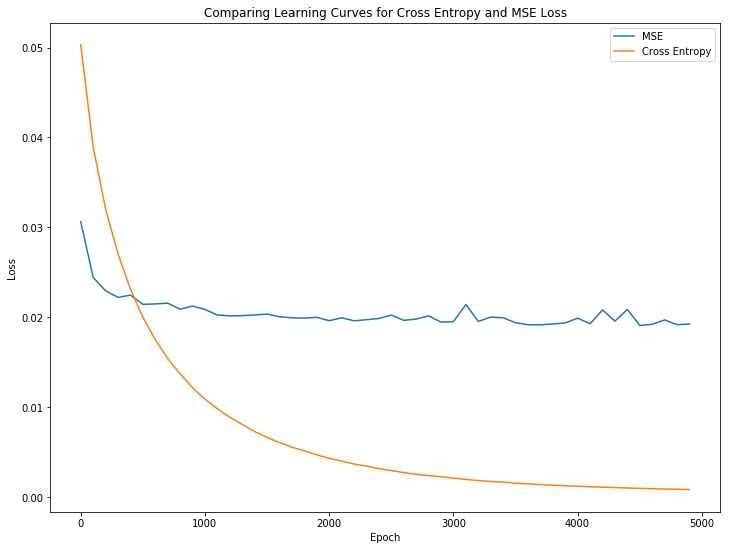

In [80]:
epochs = range(1,5001,100)
plt.figure(figsize=(12,9))
plt.title('Comparing Learning Curves for Cross Entropy and MSE Loss')
plt.plot(epochs, linear_train_losses, label='MSE')
plt.plot(epochs, train_losses, label='Cross Entropy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('figures/xentropy_mse.png', dpi=300, bbox_inches='tight')

Plotting Xentropy and MSE Loss as a function of the prediction between 0 and 1 for dummy target of 0.

In [47]:
probs = np.linspace(0, 1, num=100)
epsilon = 1e-12
target = np.zeros_like(probs)

xentropy = -(target*np.log(probs + epsilon) + (1 - target) * np.log(1 - probs + epsilon))
MSE = (1/2)*np.square(probs - target)

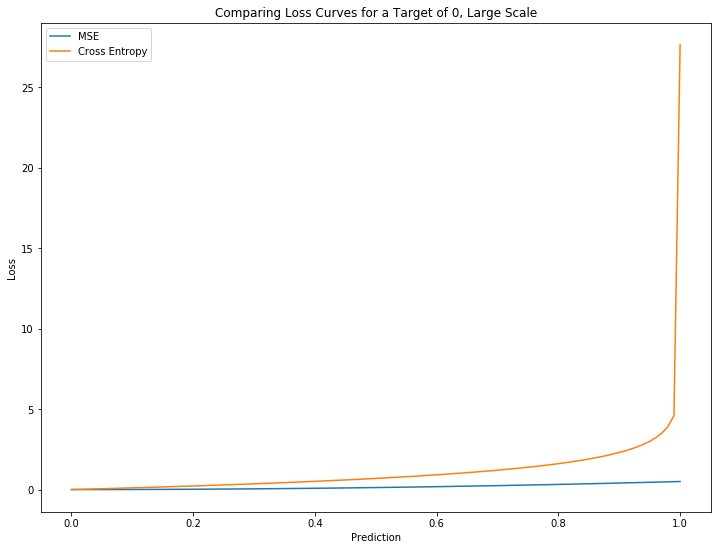

In [51]:
plt.figure(figsize=(12,9))
plt.title('Comparing Loss Curves for a Target of 0, Large Scale')
plt.plot(probs, MSE, label='MSE')
plt.plot(probs, xentropy, label='Cross Entropy')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.savefig('figures/xentropy_mse_losscurve_large.png', dpi=300, bbox_inches='tight')

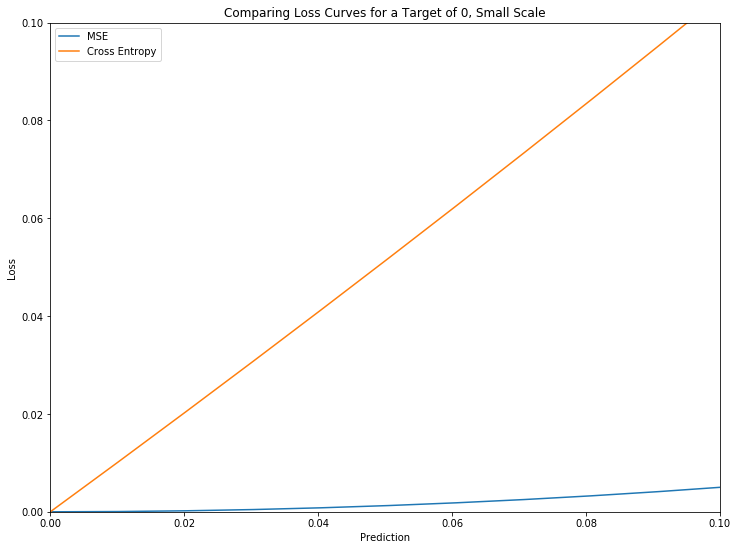

In [55]:
plt.figure(figsize=(12,9))
plt.title('Comparing Loss Curves for a Target of 0, Small Scale')
plt.plot(probs, MSE, label='MSE')
plt.plot(probs, xentropy, label='Cross Entropy')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.ylim(0,0.1)
plt.xlim(0,0.1)
plt.savefig('figures/xentropy_mse_losscurve_small.png', dpi=300, bbox_inches='tight')